# Emotion recognition with MobileNet

In this portion of the assignment, I will leverage a pre-trained model (based on either the MobileNet or EfficientNet-B0) for the task of emotion recognition.

**[Give an overview about the advantages and differences of the model]**

## Import the libraries and dataset

In [2]:
from datasets import load_dataset               # Function to load a dataset from the HuggingFace database
import matplotlib.pyplot as plt
import numpy as np                              #
from numpy import round, sqrt 
from numpy import random                        # For showing a random array of images from the dataset
from PIL import Image

import tensorflow as tf
import keras
from keras import layersout

dataset_raw = load_dataset("FastJobs/Visual_Emotional_Analysis")
num_data = dataset_raw['train'].shape[0]

# Dictionary to decode the meaning of the numerical labels
label_dict = {
    0: 'anger',
    1: 'contempt',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'neural',
    6: 'sad',
    7: 'suprise'
}

ImportError: cannot import name 'layersout' from 'keras' (c:\mnguyen\TME_6015\.venv\Lib\site-packages\keras\__init__.py)

## Data discovery
Display some examples from the dataset

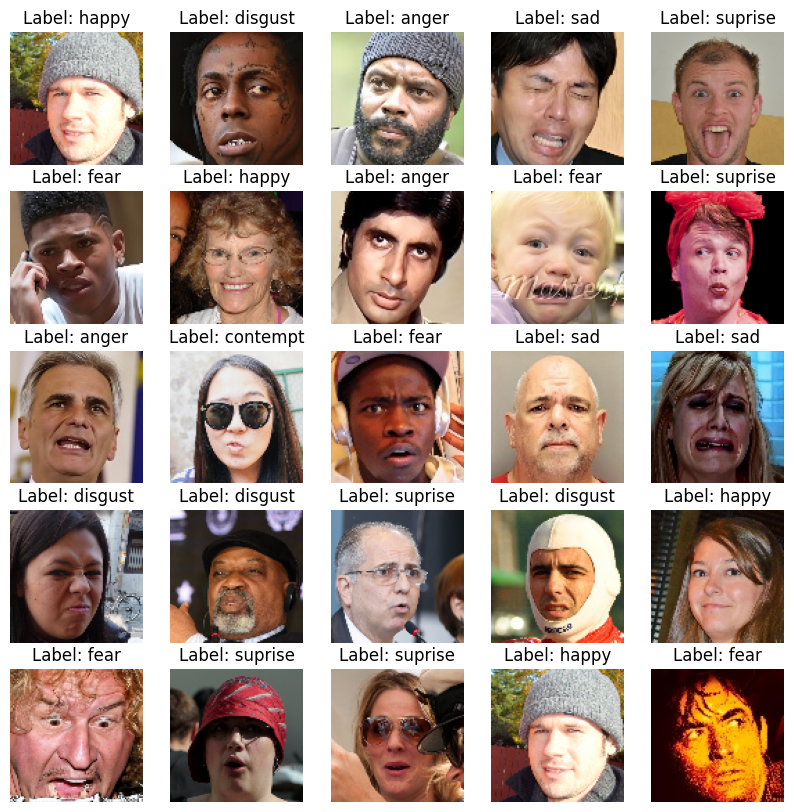

In [2]:
num_samples = 25                                                                            # number of samples to be display
num_rows = np.int8(round(sqrt(num_samples))); num_cols = np.int8(num_samples/num_rows)      # number of rows and columns for the subplot
rand = random.randint(num_data,size = (num_samples))                                        # random index for choosing the samples in the dataset
image_rand = dataset_raw['train'][rand]['image']
label_rand = dataset_raw['train'][rand]['label']

fig, axes = plt.subplots(num_rows,num_cols,figsize=(num_rows*2,num_cols*2))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        image = image_rand[index]  # Extract the image
        label = label_rand[index]  # Extract the label

        ax = axes[i,j]
        # Display the image
        ax.imshow(image)
        ax.set_title(f"Label: {label_dict[label]}")
        ax.axis("off")

To investigate the dimension of an image in this dataset, the image first need to be converted to a numpy array. The code block below shows that dimension of each image in terms of width x height x depth

In [4]:
# Let's take a random image from the sample
image = image_rand[random.randint(num_samples)]

# Dimension of the PIL image
print(f"The 2D size of the image is {image.size}\n"
      f"The depth of the image can be inferred from the image mode: {image.mode}\n")

# Dimension of the image_array
image_array = np.array(image)
print(f"Once converted to a numpy array, we can explicitly see the 3D size as \n{image_array.shape}")


The 2D size of the image is (96, 96)
The depth of the image can be inferred from the image mode: RGB

Once converted to a numpy array, we can explicitly see the 3D size as 
(96, 96, 3)


Make a train-test split to separate the training+validation data from the holdout set

In [5]:
dataset_split = dataset_raw['train'].train_test_split(test_size=0.2)

print(dataset_split)

num_train = len(dataset_split['train']['image'])
# num_train = dataset_split['train'].shape[0]
num_test = len(dataset_split['test']['image'])
# num_test = dataset_split['test'].shape[0]

# Print the number of samples in each set
print(f"There are {num_train} samples in the training set \n"
      f"There are {num_test} samples in the testing set")



DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 640
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 160
    })
})
There are 640 samples in the training set 
There are 160 samples in the testing set


## Image preprocessing (optional)

To simplify the training process, the following pre-processing steps are applied to the datasets before they are used for network training
* Convert into gray scale

In [ ]:
images_raw = dataset_raw['train']

## Building the model

Given that the model only has about 800 instances. I will perform dataaugmentation by applying some random transformation to the data. This is accomplished by adding some keras sequential layers that apply the transformation to the image before it is fed into the neural netowrk 

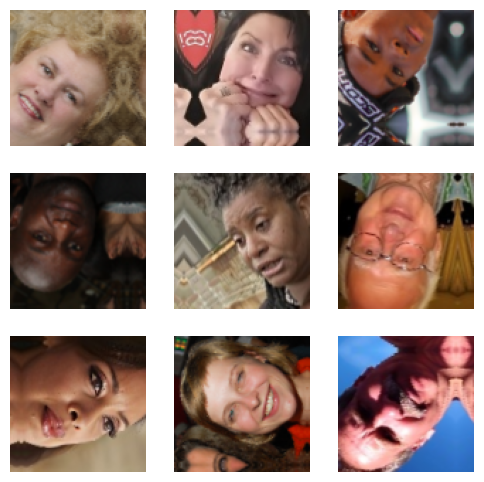

In [ ]:
image_train_array = np.array(dataset_split['train']['image'])/255
label_train_array = np.array(dataset_split['train']['label'])

image_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(96, 96, 3)),
    layers.RandomRotation(0.4),
    layers.RandomTranslation(0.2,0.2),
])

plt.figure(figsize=(6, 6))
for i in range(9):
    # Select a random image to show
    random_index = np.random.randint(0, len(image_train_array))
    image = image_train_array[random_index]
    
    # Apply the image augmentation kernel on the image (must be a 4D tensor in the form of (batch, width, height, channel))
    augmented_image = image_augmentation(tf.expand_dims(image, axis=0))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_image).numpy())
    plt.axis("off")